# Building a Regression Models for Flight Arrival Delay 


In [76]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [3]:
flight = pd.read_csv("flights.csv")
airport = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression


In [5]:
flight_data = flight
data_airport = airport
data_airlines = airlines

# Description of Flights Dataset

In [6]:
flight_data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [7]:
# Null Values in Flight Dataset
flight_data.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

# Percentage of Null Values in flights dataset

In [8]:
check_Null=flight_data.isnull().sum()
check_Null=check_Null*100
check_Null/flight_data.shape[0]

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [9]:
# First 10 rows in flights dataset
flight_data.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Airport dataset

In [10]:
# Top 10 rows of airport dataset
data_airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


# Airline Dataset

In [11]:
# The dataset contains 13 airlines
data_airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


# Correlation for Arrival_Delay with other features

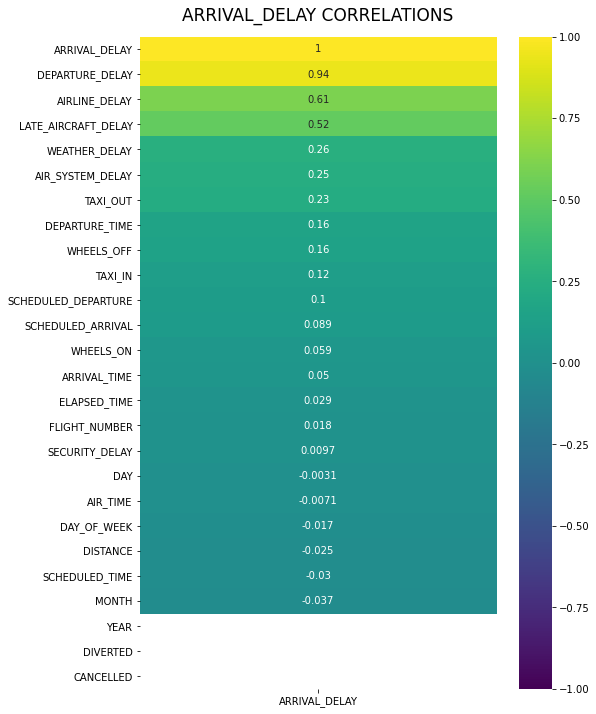

In [12]:
# heatmap for arrival delay
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(flight_data.corr()[['ARRIVAL_DELAY']].sort_values(by='ARRIVAL_DELAY', ascending=False),cmap='viridis', vmin=-1, vmax=1, annot=True)
heatmap.set_title('ARRIVAL_DELAY CORRELATIONS', fontdict={'fontsize':17}, pad=16);


In [17]:
# Droping null values from features with low percentage of null values.
model1_data = flight_data.dropna(subset=["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])



In [18]:
# Dropping features which are not higly correlated with arrival delay
model1_data = model1_data.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)
model1_data.isnull().sum()

AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
SCHEDULED_TIME         0
ELAPSED_TIME           0
DISTANCE               0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [19]:
# Formatting the time to hour:min:second
def Convert_Min(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [20]:
model1_data['CARRIERDEPARTURE_TIME'] = model1_data['DEPARTURE_TIME'].apply(Convert_Min)
model1_data['CARRIER_SCHED_ARRIV'] =model1_data['SCHEDULED_ARRIVAL'].apply(Convert_Min)
model1_data['CARRIER_SCHED_DEPART'] =model1_data['SCHEDULED_DEPARTURE'].apply(Convert_Min)
model1_data['CARRIER_ACTUAL_ARRIVAL'] =model1_data['ARRIVAL_TIME'].apply(Convert_Min)
model1_data['CARRIER_ACTUAL_ARRIVAL']

27         06:07:00
30         06:32:00
35         06:10:00
50         05:20:00
52         07:30:00
             ...   
5819023    03:45:00
5819051    05:35:00
5819057    03:46:00
5819069    10:20:00
5819071    06:25:00
Name: CARRIER_ACTUAL_ARRIVAL, Length: 1063439, dtype: object

In [21]:
# Renaming features
model1_finaldata = model1_data
model1_finaldata = model1_finaldata.rename(columns={"TAXI_IN":"CARRIER_TAXIIN",'TAXI_OUT':'CARRIER_TAXIOUT','LATE_AIRCRAFT_DELAY':
                                                   'CARRIER_AIRCRAFTDELAY','DISTANCE':'DISTANCE_AIRPORTS'})

In [22]:
model1_data.head(10)

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,...,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CARRIERDEPARTURE_TIME,CARRIER_SCHED_ARRIV,CARRIER_SCHED_DEPART,CARRIER_ACTUAL_ARRIVAL
27,NK,MSP,FLL,115,127.0,12.0,14.0,207.0,220.0,1487,...,0,25.0,0.0,0.0,0.0,0.0,01:27:00,05:42:00,01:15:00,06:07:00
30,NK,PHX,ORD,125,237.0,72.0,9.0,204.0,175.0,1440,...,0,43.0,0.0,0.0,0.0,0.0,02:37:00,05:49:00,01:25:00,06:32:00
35,HA,LAS,HNL,145,145.0,0.0,16.0,370.0,385.0,2762,...,0,0.0,0.0,15.0,0.0,0.0,01:45:00,05:55:00,01:45:00,06:10:00
50,B6,BQN,MCO,307,304.0,-3.0,25.0,173.0,196.0,1129,...,0,20.0,0.0,0.0,0.0,0.0,03:04:00,05:00:00,03:07:00,05:20:00
52,B6,SJU,MCO,400,535.0,95.0,9.0,185.0,175.0,1189,...,0,0.0,0.0,85.0,0.0,0.0,05:35:00,06:05:00,04:00:00,07:30:00
55,B6,SJU,BDL,438,550.0,72.0,15.0,241.0,258.0,1666,...,0,17.0,0.0,72.0,0.0,0.0,05:50:00,07:39:00,04:38:00,09:08:00
70,AA,DFW,MIA,515,703.0,108.0,15.0,161.0,155.0,1121,...,0,0.0,0.0,0.0,0.0,102.0,07:03:00,08:56:00,05:15:00,10:38:00
73,US,PDX,PHX,520,620.0,60.0,13.0,150.0,150.0,1009,...,0,0.0,0.0,60.0,0.0,0.0,06:20:00,08:50:00,05:20:00,09:50:00
74,AA,IAH,MIA,520,618.0,58.0,19.0,141.0,137.0,964,...,0,0.0,0.0,54.0,0.0,0.0,06:18:00,08:41:00,05:20:00,09:35:00
86,AA,DEN,DFW,530,623.0,53.0,32.0,125.0,138.0,641,...,0,13.0,0.0,53.0,0.0,0.0,06:23:00,08:35:00,05:30:00,09:41:00


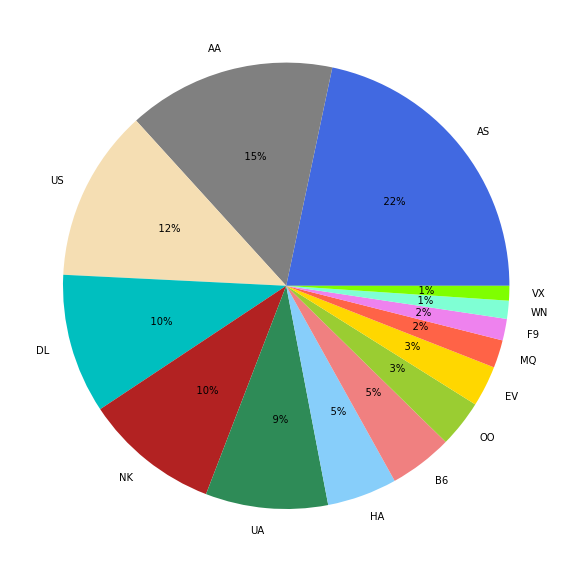

In [23]:
# piechart showing percentages of airlines 
axis = plt.subplots(figsize=(10,14))
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
Name = flight_data["AIRLINE"].unique()
size = flight_data["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%',colors=colors)
plt.show()

Pie chart represnts the percentage of airlines in the total dataset

In [24]:
merge_data = model1_data

In [25]:
# merging airlines dataset to flight dataset
merge_data= merge_data.merge(data_airlines,left_on='AIRLINE', right_on='IATA_CODE', how='inner')


In [26]:
merge_data

,AIRLINE_x,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,...,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CARRIERDEPARTURE_TIME,CARRIER_SCHED_ARRIV,CARRIER_SCHED_DEPART,CARRIER_ACTUAL_ARRIVAL,IATA_CODE,AIRLINE_y
0,NK,MSP,FLL,115,127.0,12.0,14.0,207.0,220.0,1487,...,0.0,0.0,0.0,0.0,01:27:00,05:42:00,01:15:00,06:07:00,NK,Spirit Air Lines
1,NK,PHX,ORD,125,237.0,72.0,9.0,204.0,175.0,1440,...,0.0,0.0,0.0,0.0,02:37:00,05:49:00,01:25:00,06:32:00,NK,Spirit Air Lines
2,NK,ORD,LGA,556,547.0,-9.0,16.0,124.0,160.0,733,...,0.0,0.0,0.0,0.0,05:47:00,09:00:00,05:56:00,09:27:00,NK,Spirit Air Lines
3,NK,ACY,RSW,600,742.0,102.0,10.0,171.0,155.0,982,...,0.0,0.0,0.0,0.0,07:42:00,08:51:00,06:00:00,10:17:00,NK,Spirit Air Lines
4,NK,DTW,LGA,600,558.0,-2.0,11.0,98.0,158.0,502,...,0.0,0.0,0.0,0.0,05:58:00,07:38:00,06:00:00,08:36:00,NK,Spirit Air Lines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063434,VX,LAX,LAS,1700,1823.0,83.0,10.0,65.0,64.0,236,...,0.0,0.0,82.0,0.0,18:23:00,18:05:00,17:00:00,19:27:00,VX,Virgin America
1063435,VX,LAX,DAL,1730,1921.0,111.0,8.0,180.0,149.0,1246,...,0.0,0.0,80.0,0.0,19:21:00,22:30:00,17:30:00,23:50:00,VX,Virgin America
1063436,VX,DAL,SFO,1745,1833.0,48.0,14.0,235.0,229.0,1476,...,0.0,0.0,42.0,0.0,18:33:00,19:40:00,17:45:00,20:22:00,VX,Virgin America
1063437,VX,DAL,LAS,1800,1829.0,29.0,14.0,170.0,177.0,1067,...,0.0,0.0,29.0,0.0,18:29:00,18:50:00,18:00:00,19:26:00,VX,Virgin America


In [27]:
# Renaming features for better understanding and analysis
merge_data = merge_data.drop(['AIRLINE_x','IATA_CODE'], axis=1)
merge_data= merge_data.rename(columns={"AIRLINE_y":"AIRLINE"})

merge_data

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,TAXI_IN,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CARRIERDEPARTURE_TIME,CARRIER_SCHED_ARRIV,CARRIER_SCHED_DEPART,CARRIER_ACTUAL_ARRIVAL,AIRLINE
0,MSP,FLL,115,127.0,12.0,14.0,207.0,220.0,1487,40.0,...,25.0,0.0,0.0,0.0,0.0,01:27:00,05:42:00,01:15:00,06:07:00,Spirit Air Lines
1,PHX,ORD,125,237.0,72.0,9.0,204.0,175.0,1440,10.0,...,43.0,0.0,0.0,0.0,0.0,02:37:00,05:49:00,01:25:00,06:32:00,Spirit Air Lines
2,ORD,LGA,556,547.0,-9.0,16.0,124.0,160.0,733,52.0,...,27.0,0.0,0.0,0.0,0.0,05:47:00,09:00:00,05:56:00,09:27:00,Spirit Air Lines
3,ACY,RSW,600,742.0,102.0,10.0,171.0,155.0,982,4.0,...,86.0,0.0,0.0,0.0,0.0,07:42:00,08:51:00,06:00:00,10:17:00,Spirit Air Lines
4,DTW,LGA,600,558.0,-2.0,11.0,98.0,158.0,502,80.0,...,58.0,0.0,0.0,0.0,0.0,05:58:00,07:38:00,06:00:00,08:36:00,Spirit Air Lines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063434,LAX,LAS,1700,1823.0,83.0,10.0,65.0,64.0,236,11.0,...,0.0,0.0,0.0,82.0,0.0,18:23:00,18:05:00,17:00:00,19:27:00,Virgin America
1063435,LAX,DAL,1730,1921.0,111.0,8.0,180.0,149.0,1246,3.0,...,0.0,0.0,0.0,80.0,0.0,19:21:00,22:30:00,17:30:00,23:50:00,Virgin America
1063436,DAL,SFO,1745,1833.0,48.0,14.0,235.0,229.0,1476,9.0,...,0.0,0.0,0.0,42.0,0.0,18:33:00,19:40:00,17:45:00,20:22:00,Virgin America
1063437,DAL,LAS,1800,1829.0,29.0,14.0,170.0,177.0,1067,8.0,...,7.0,0.0,0.0,29.0,0.0,18:29:00,18:50:00,18:00:00,19:26:00,Virgin America


In [28]:
# Merging Airport dataset to flight dataset
merge_data = merge_data.merge(data_airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')

In [29]:
merge_data.columns

Index(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'DISTANCE', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CARRIERDEPARTURE_TIME',
       'CARRIER_SCHED_ARRIV', 'CARRIER_SCHED_DEPART', 'CARRIER_ACTUAL_ARRIVAL',
       'AIRLINE', 'IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [30]:
merge_data.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,TAXI_IN,...,CARRIER_SCHED_DEPART,CARRIER_ACTUAL_ARRIVAL,AIRLINE,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,MSP,FLL,115,127.0,12.0,14.0,207.0,220.0,1487,40.0,...,01:15:00,06:07:00,Spirit Air Lines,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
1,MSP,PHX,926,931.0,5.0,41.0,201.0,228.0,1276,5.0,...,09:26:00,12:19:00,Spirit Air Lines,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
2,MSP,TPA,1540,1556.0,16.0,16.0,190.0,189.0,1306,15.0,...,15:40:00,20:05:00,Spirit Air Lines,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
3,MSP,DFW,2001,2016.0,15.0,12.0,149.0,161.0,852,11.0,...,20:01:00,22:57:00,Spirit Air Lines,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
4,MSP,LAS,2204,12.0,128.0,9.0,205.0,173.0,1299,5.0,...,22:04:00,01:05:00,Spirit Air Lines,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692


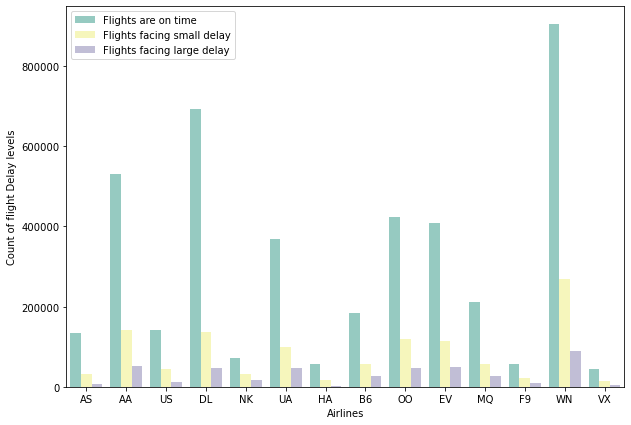

In [31]:
arrival_flight = flight_data
# Plotting flight arrival delay in three ranges
arrival_delay = lambda x:((0,1)[x > 5],2)[x > 45]
arrival_flight['ARRIVAL_DELAY_RANGE'] = arrival_flight['ARRIVAL_DELAY'].apply(arrival_delay)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(x="AIRLINE", hue='ARRIVAL_DELAY_RANGE', data=arrival_flight,palette="Set3")
plt.xlabel("Airlines")
plt.ylabel("Count of flight Delay levels")

ax.legend(["Flights are on time", "Flights facing small delay","Flights facing large delay"])
plt.show()


We have divided arrival delays into three ranges less than five minutes, five to forty five minutes and greater than forty five minutes for each airline and found an interesting relation:
 a high percentage of airlines have less than five minutes and very few  percent have  large delays.


In [32]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003360 entries, 0 to 1003359
Data columns (total 32 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ORIGIN_AIRPORT          1003360 non-null  object 
 1   DESTINATION_AIRPORT     1003360 non-null  object 
 2   SCHEDULED_DEPARTURE     1003360 non-null  int64  
 3   DEPARTURE_TIME          1003360 non-null  float64
 4   DEPARTURE_DELAY         1003360 non-null  float64
 5   TAXI_OUT                1003360 non-null  float64
 6   SCHEDULED_TIME          1003360 non-null  float64
 7   ELAPSED_TIME            1003360 non-null  float64
 8   DISTANCE                1003360 non-null  int64  
 9   TAXI_IN                 1003360 non-null  float64
 10  SCHEDULED_ARRIVAL       1003360 non-null  int64  
 11  ARRIVAL_TIME            1003360 non-null  float64
 12  ARRIVAL_DELAY           1003360 non-null  float64
 13  DIVERTED                1003360 non-null  int64  
 14  CA

In [33]:
merge_data.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,TAXI_IN,...,CARRIER_SCHED_DEPART,CARRIER_ACTUAL_ARRIVAL,AIRLINE,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,MSP,FLL,115,127.0,12.0,14.0,207.0,220.0,1487,40.0,...,01:15:00,06:07:00,Spirit Air Lines,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
1,MSP,PHX,926,931.0,5.0,41.0,201.0,228.0,1276,5.0,...,09:26:00,12:19:00,Spirit Air Lines,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
2,MSP,TPA,1540,1556.0,16.0,16.0,190.0,189.0,1306,15.0,...,15:40:00,20:05:00,Spirit Air Lines,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
3,MSP,DFW,2001,2016.0,15.0,12.0,149.0,161.0,852,11.0,...,20:01:00,22:57:00,Spirit Air Lines,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
4,MSP,LAS,2204,12.0,128.0,9.0,205.0,173.0,1299,5.0,...,22:04:00,01:05:00,Spirit Air Lines,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692


In [34]:
le= LabelEncoder()


In [69]:
model1_finaldata['ORIGIN_AIRPORT'] = model1_finaldata['ORIGIN_AIRPORT'].astype(str)
model1_finaldata['DESTINATION_AIRPORT'] = model1_finaldata['DESTINATION_AIRPORT'].astype(str)

In [35]:
model1_finaldata.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,CARRIER_TAXIOUT,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE_AIRPORTS,...,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,CARRIER_AIRCRAFTDELAY,WEATHER_DELAY,CARRIERDEPARTURE_TIME,CARRIER_SCHED_ARRIV,CARRIER_SCHED_DEPART,CARRIER_ACTUAL_ARRIVAL
27,NK,MSP,FLL,115,127.0,12.0,14.0,207.0,220.0,1487,...,0,25.0,0.0,0.0,0.0,0.0,01:27:00,05:42:00,01:15:00,06:07:00
30,NK,PHX,ORD,125,237.0,72.0,9.0,204.0,175.0,1440,...,0,43.0,0.0,0.0,0.0,0.0,02:37:00,05:49:00,01:25:00,06:32:00
35,HA,LAS,HNL,145,145.0,0.0,16.0,370.0,385.0,2762,...,0,0.0,0.0,15.0,0.0,0.0,01:45:00,05:55:00,01:45:00,06:10:00
50,B6,BQN,MCO,307,304.0,-3.0,25.0,173.0,196.0,1129,...,0,20.0,0.0,0.0,0.0,0.0,03:04:00,05:00:00,03:07:00,05:20:00
52,B6,SJU,MCO,400,535.0,95.0,9.0,185.0,175.0,1189,...,0,0.0,0.0,85.0,0.0,0.0,05:35:00,06:05:00,04:00:00,07:30:00


In [37]:
# Label Encoding features airline,origin airport and destination airport
model1_finaldata['AIRLINE']= le.fit_transform(model1_finaldata.loc[:,'AIRLINE'])
model1_finaldata['ORIGIN_AIRPORT'] = le.fit_transform(model1_finaldata.loc[:,'ORIGIN_AIRPORT'])
model1_finaldata['DESTINATION_AIRPORT'] = le.fit_transform(model1_finaldata.loc[:,'DESTINATION_AIRPORT'])

In [38]:
model1_finaldata.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,CARRIER_TAXIOUT,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE_AIRPORTS,...,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,CARRIER_AIRCRAFTDELAY,WEATHER_DELAY,CARRIERDEPARTURE_TIME,CARRIER_SCHED_ARRIV,CARRIER_SCHED_DEPART,CARRIER_ACTUAL_ARRIVAL
27,8,519,417,115,127.0,12.0,14.0,207.0,220.0,1487,...,0,25.0,0.0,0.0,0.0,0.0,01:27:00,05:42:00,01:15:00,06:07:00
30,8,542,531,125,237.0,72.0,9.0,204.0,175.0,1440,...,0,43.0,0.0,0.0,0.0,0.0,02:37:00,05:49:00,01:25:00,06:32:00
35,6,477,444,145,145.0,0.0,16.0,370.0,385.0,2762,...,0,0.0,0.0,15.0,0.0,0.0,01:45:00,05:55:00,01:45:00,06:10:00
50,2,345,496,307,304.0,-3.0,25.0,173.0,196.0,1129,...,0,20.0,0.0,0.0,0.0,0.0,03:04:00,05:00:00,03:07:00,05:20:00
52,2,588,496,400,535.0,95.0,9.0,185.0,175.0,1189,...,0,0.0,0.0,85.0,0.0,0.0,05:35:00,06:05:00,04:00:00,07:30:00


In [39]:
# Selecting features which have strong relation with arrival delay
Correlated_Features=pd.DataFrame(model1_finaldata[['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT',
                               'DEPARTURE_DELAY','CARRIER_TAXIOUT','ELAPSED_TIME',
                               'DISTANCE_AIRPORTS','CARRIER_TAXIIN','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY',
                               'AIRLINE_DELAY','CARRIER_AIRCRAFTDELAY','WEATHER_DELAY']])

In [40]:
Correlated_Features.head(15)

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,CARRIER_TAXIOUT,ELAPSED_TIME,DISTANCE_AIRPORTS,CARRIER_TAXIIN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,CARRIER_AIRCRAFTDELAY,WEATHER_DELAY
27,8,519,417,12.0,14.0,220.0,1487,40.0,25.0,25.0,0.0,0.0,0.0,0.0
30,8,542,531,72.0,9.0,175.0,1440,10.0,43.0,43.0,0.0,0.0,0.0,0.0
35,6,477,444,0.0,16.0,385.0,2762,8.0,15.0,0.0,0.0,15.0,0.0,0.0
50,2,345,496,-3.0,25.0,196.0,1129,11.0,20.0,20.0,0.0,0.0,0.0,0.0
52,2,588,496,95.0,9.0,175.0,1189,3.0,85.0,0.0,0.0,85.0,0.0,0.0
55,2,588,329,72.0,15.0,258.0,1666,6.0,89.0,17.0,0.0,72.0,0.0,0.0
70,0,389,506,108.0,15.0,155.0,1121,7.0,102.0,0.0,0.0,0.0,0.0,102.0
73,11,539,542,60.0,13.0,150.0,1009,5.0,60.0,0.0,0.0,60.0,0.0,0.0
74,0,454,506,58.0,19.0,137.0,964,7.0,54.0,0.0,0.0,54.0,0.0,0.0
86,0,388,389,53.0,32.0,138.0,641,10.0,66.0,13.0,0.0,53.0,0.0,0.0


In [41]:
X_model2 = Correlated_Features.drop('ARRIVAL_DELAY',axis = 1)
y_model2 = Correlated_Features['ARRIVAL_DELAY']


In [42]:
X_model2.shape

(1063439, 13)

In [43]:
# Splitting the Data into Training and Testing set in the ratio 70:30
X_train,X_test,y_train,y_test = train_test_split(X_model2,y_model2,test_size=0.3,random_state = 2)

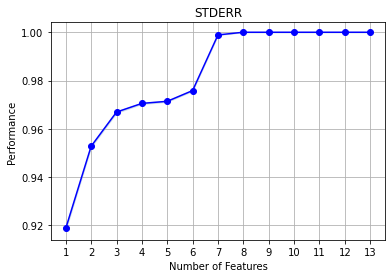

In [44]:
# Chosing the best features using Sequential Feature Selection
reg = LinearRegression()
feature_select= SFS(reg, k_features='best', forward=True, floating=False)
model = feature_select.fit(X_train, y_train)

fig = plot_sfs(feature_select.get_metric_dict(), kind='std_err')

plt.title('STDERR')
plt.grid()
plt.show()

In [45]:
X_train.shape


(744407, 13)

In [46]:
X_test.shape

(319032, 13)

In [47]:
# Normalizing the values
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [78]:
# Function helps for plotting model performance 
def plot_performance(predictions, trueval):
    performance_df = pd.DataFrame({"Label":trueval})
    performance_df["Prediction"] = predictions
    sns.jointplot(y="Label", x="Prediction", data=performance_df, kind="reg",height=7,color="orange")
    plt.plot(range(1500), range(1500))
    plt.show()

# Ridge Regression

In [75]:
model = Ridge(alpha=1)
model1 = model.fit(X_train_sc,y_train)
Y_predict=model1.predict(X_test_sc)
ridge_mae = mean_absolute_error(y_test, Y_predict)
ridge_rmse = math.sqrt(mean_squared_error(y_test, Y_predict))
ridge_r2 = r2_score(y_test, Y_predict)
print('MAE:', ridge_mae)  
print('RMSE:', ridge_rmse)
print('R2 Score : ',ridge_r2)


MAE: 0.00057360297584229
RMSE: 0.0007600052451497653
R2 Score :  0.9999999998587015


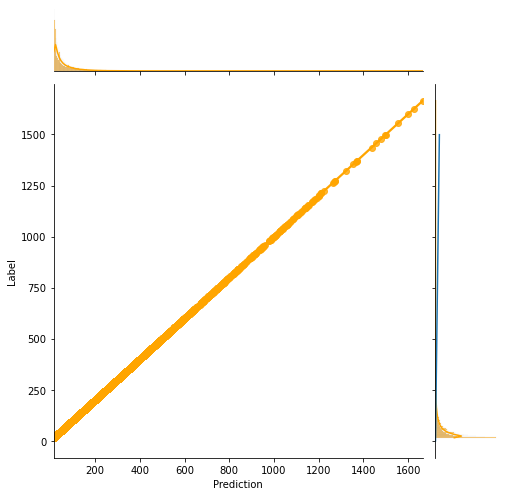

In [79]:
plot_performance(Y_predict, y_test)


# LASSO Regression

In [77]:
model = Lasso(alpha=0.25)
model1 = model.fit(X_train_sc,y_train)
Y_Lpredict=model1.predict(X_test_sc)
lasso_mae = mean_absolute_error(y_test, Y_Lpredict)
lasso_rmse = math.sqrt(mean_squared_error(y_test, Y_Lpredict))
lasso_r2 = r2_score(y_test, Y_Lpredict)
print('MAE:', lasso_mae)  
print('RMSE:', lasso_rmse)
print('R2 Score : ',lasso_r2)

MAE: 1.0323991907934806
RMSE: 1.4281579348839013
R2 Score :  0.999501050026884


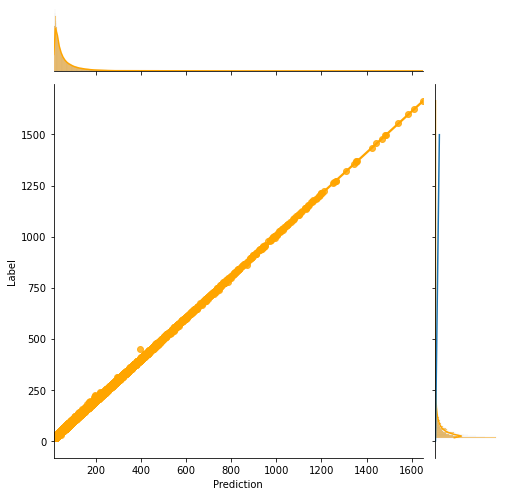

In [52]:
plot_performance(Y_Lpredict, y_test)

# Random Forest Regression

In [53]:
model = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=0, n_jobs=-1)
model1 = model.fit(X_train_sc,y_train)
Y_Rpredict=model1.predict(X_test_sc)
rf_mae = mean_absolute_error(y_test, Y_Rpredict)
rf_rmse = math.sqrt(mean_squared_error(y_test, Y_Rpredict))
rf_r2 = r2_score(y_test, Y_Rpredict)
print('Mean Absolute Error:', rf_mae)  
print('Root Mean Squared Error:', rf_rmse)
print('R2 Score: ',rf_r2)


Mean Absolute Error: 5.935521477010345
Root Mean Squared Error: 8.64683980656287
R2 Score:  0.9817097620462434


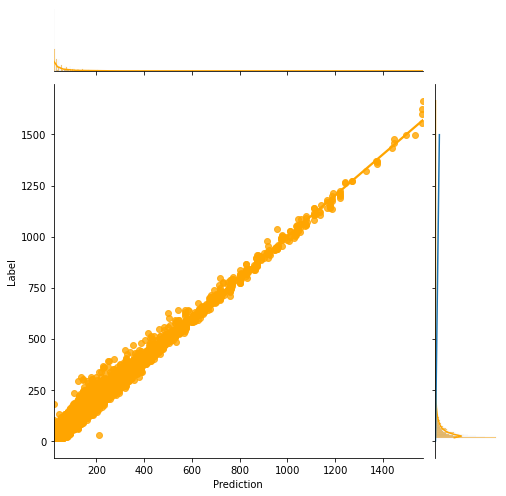

In [54]:
plot_performance(Y_Rpredict, y_test)

# MLP Regression

In [60]:
model = MLPRegressor(alpha = 0.03, learning_rate_init = 0.04,activation="relu" ,random_state=1, max_iter=600)
model1 = model.fit(X_train_sc,y_train)
Y_Mpredict=model1.predict(X_test_sc)
mlp_mae = mean_absolute_error(y_test, Y_Mpredict)
mlp_rmse = math.sqrt(mean_squared_error(y_test, Y_Mpredict))
mlp_r2 = r2_score(y_test, Y_Mpredict)
print('Mean Absolute Error:', mlp_mae)  
print('Root Mean Squared Error:', mlp_rmse)
print('R2 Score: ',mlp_r2)


Mean Absolute Error: 0.18189055461389225
Root Mean Squared Error: 0.29814761008879825
R2 Score:  0.9999782546103482


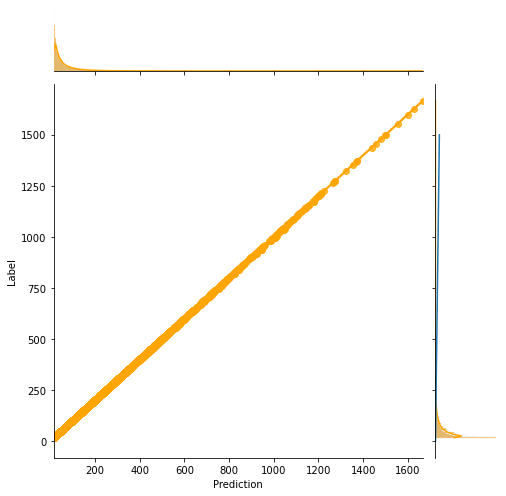

In [61]:
plot_performance(Y_Mpredict, y_test)


# Gradient Boost Regression

In [62]:
model = GradientBoostingRegressor(n_estimators=100,min_samples_leaf=1, max_depth=3, min_samples_split=2, max_leaf_nodes=None, max_features=None, learning_rate=1.0, random_state=0)
model1 = model.fit(X_train_sc,y_train)
Y_Gpredict=model1.predict(X_test_sc)
gr_mae = mean_absolute_error(y_test, Y_Gpredict)
gr_rmse = math.sqrt(mean_squared_error(y_test, Y_Gpredict))
gr_r2 = r2_score(y_test, Y_Gpredict)
print('Mean Absolute Error:', gr_mae)  
print('Root Mean Squared Error:', gr_rmse)
print('R2 Score: ',gr_r2)


Mean Absolute Error: 2.528287410430955
Root Mean Squared Error: 4.04368464240481
R2 Score:  0.9960000083341526


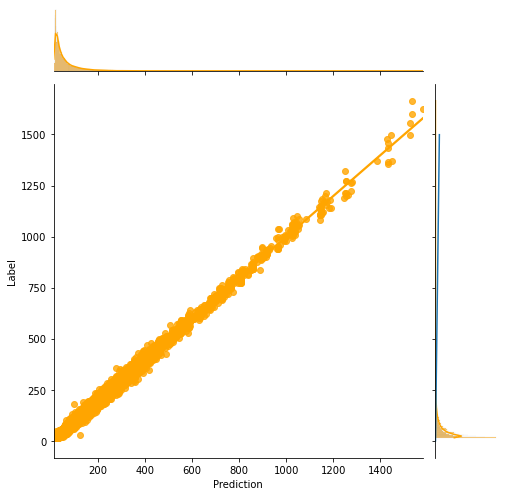

In [63]:
plot_performance(Y_Gpredict, y_test)

# Decision Tree Regression

In [64]:
model = DecisionTreeRegressor(max_depth=8,random_state=0)
model1 = model.fit(X_train_sc,y_train)
Y_Dpredict=model1.predict(X_test_sc)
df_mae = mean_absolute_error(y_test, Y_Dpredict)
df_rmse = math.sqrt(mean_squared_error(y_test, Y_Dpredict))
df_r2 = r2_score(y_test, Y_Dpredict)
print('Mean Absolute Error:', df_mae)  
print('Root Mean Squared Error:', df_rmse)
print('R2 Score: ',df_r2)


Mean Absolute Error: 5.506533638922718
Root Mean Squared Error: 8.170778197052375
R2 Score:  0.9836683008183668


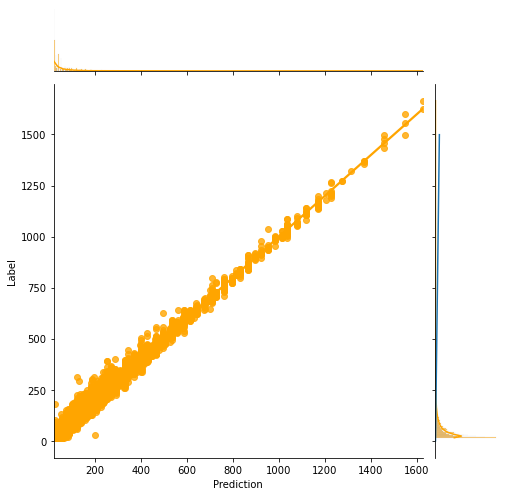

In [70]:
plot_performance(Y_Dpredict, y_test)

# Performance Analysis

In [66]:
alg = ['ridge','lasso','Random Forest','MLP','Gradient Boost','Decision Tree']

In [67]:
alg_rmse = [ridge_rmse,lasso_rmse,rf_rmse,mlp_rmse,gr_rmse,df_rmse]


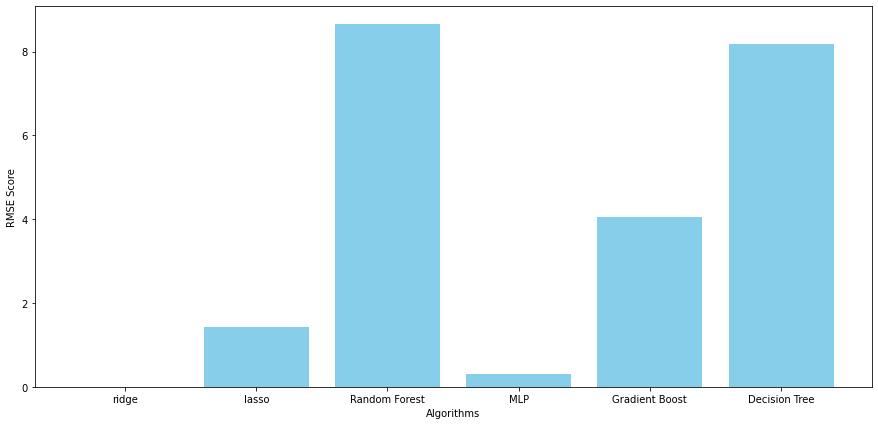

In [68]:
plt.figure(figsize=(15, 7))
plt.bar(alg,alg_rmse,color="skyblue")
plt.xlabel('Algorithms')
plt.ylabel('RMSE Score')
plt.show()

References
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
https://pandas.pydata.org/docs/ 
https://www.kaggle.com/dongxu027/airline-delays-eda-deep-dive-lessons-learned